In [6]:
from ex1_student_solution import Solution
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
mat = sio.loadmat('matches.mat')
match_p_src = mat['match_p_src']
match_p_dst = mat['match_p_dst']

In [8]:
H = Solution.compute_homography_naive(match_p_src, match_p_dst)

In [9]:
src_image = cv2.imread('src.jpg')
dst_image = cv2.imread('dst.jpg')

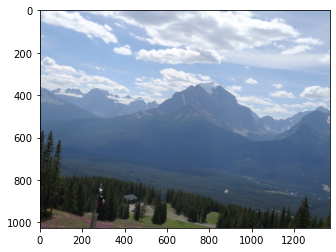

In [10]:
plt.imshow(cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB))

In [11]:
# dst_image_forward_slow = Solution.compute_forward_homography_slow(H, src_image, dst_image.shape)
# plt.imshow(dst_image_forward_slow)

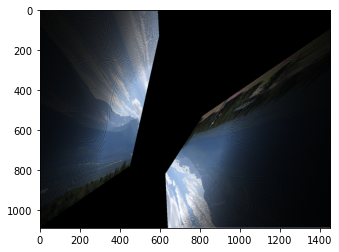

In [12]:
dst_image_forward_fast = Solution.compute_forward_homography_fast(H, src_image, dst_image.shape)
plt.imshow(cv2.cvtColor(dst_image_forward_fast, cv2.COLOR_BGR2RGB))

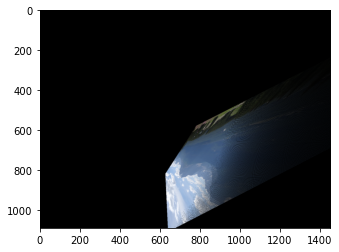

In [20]:
new_image_size = np.array([src_image.shape[0]/1.5, src_image.shape[1]/1.5]).round().astype(int)
src_image_downscaled = cv2.resize(src_image, dsize=new_image_size)

dst_image_forward_fast = Solution.compute_forward_homography_fast(H, src_image_downscaled, dst_image.shape)
plt.imshow(cv2.cvtColor(dst_image_forward_fast, cv2.COLOR_BGR2RGB))